In [1]:
import pandas as pd

In [ ]:

# Business Understanding:
# O objetivo deste projeto é realizar uma análise preditiva utilizando o banco de dados de um condomínio de médio porte.
# Serão ilustradas análises simples, como previsão orçamentária mensal, identificação de padrões de inadimplência e simulação de cenários.
# O intuito é auxiliar na tomada de decisão financeira, reduzir a inadimplência por meio da identificação antecipada de risco,
# além de otimizar a previsão orçamentária e o uso do orçamento.
# O banco de dados utilizado é fiel à realidade de um condomínio, porém, para proteger os dados dos moradores,
# algumas colunas e valores foram alterados, tornando-o fictício, mas mantendo características de um condomínio real,
# incluindo informações sobre moradores, inadimplência, previsão orçamentária e uso do orçamento.
# O intuito da análise é auxiliar, síndicos, administradores condominiais e conselhos fiscais na tomada de decisão financeira
#Granularidade do dataset, cada linha representa o registro mensal de uma unidade(apartamento ou loja)

In [113]:
predio = pd.read_csv("condominio.csv")
predio.head(5)

,data,unidade_id,tipo_unidade,metragem,valor_cota,pagou,dias_atraso,valor_pago,despesa_total,obra_extraordinaria
0,2020-01-01,Apt001,apartamento,39,556.45,True,0,556.45,33048.316687,0.0
1,2020-01-01,Apt002,apartamento,55,619.22,True,0,619.22,33048.316687,0.0
2,2020-01-01,Apt003,apartamento,39,568.89,True,0,568.89,33048.316687,0.0
3,2020-01-01,Apt004,apartamento,39,572.01,True,0,572.01,33048.316687,0.0
4,2020-01-01,Apt005,apartamento,39,575.91,False,30,243.17,33048.316687,0.0


In [53]:
#identificando colunas 
print(predio.columns)

Index(['data', 'unidade_id', 'tipo_unidade', 'metragem', 'valor_cota', 'pagou',
       'dias_atraso', 'valor_pago', 'despesa_total', 'obra_extraordinaria'],
      dtype='object')


In [54]:
predio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data                 20460 non-null  object 
 1   unidade_id           20460 non-null  object 
 2   tipo_unidade         20460 non-null  object 
 3   metragem             20460 non-null  int64  
 4   valor_cota           20460 non-null  float64
 5   pagou                20460 non-null  bool   
 6   dias_atraso          20460 non-null  int64  
 7   valor_pago           20460 non-null  float64
 8   despesa_total        20460 non-null  float64
 9   obra_extraordinaria  20460 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(3)
memory usage: 1.4+ MB


In [55]:
#tamanho do dataset condominio
predio.shape

(20460, 10)

In [56]:
## descrição estatística basica das variaveis numéricas 
predio.describe()

,metragem,valor_cota,dias_atraso,valor_pago,despesa_total,obra_extraordinaria
count,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000,20460.000000
mean,40.263930,592.741355,2.828055,574.635664,34636.468926,5126.965996
std,6.575741,143.836841,10.192461,153.703353,5778.774352,11315.212579
min,20.000000,464.100000,0.000000,194.970000,25553.998702,0.000000
25%,39.000000,513.367500,0.000000,504.332500,29234.471499,0.000000
50%,39.000000,547.670000,0.000000,541.980000,35187.251581,0.000000
75%,39.000000,583.455000,0.000000,581.032500,39099.060889,0.000000
max,60.000000,1099.770000,60.000000,1099.770000,44714.364423,36955.394564


In [57]:
## verificando se existem valores nulos
predio.isnull().sum()


data                   0
unidade_id             0
tipo_unidade           0
metragem               0
valor_cota             0
pagou                  0
dias_atraso            0
valor_pago             0
despesa_total          0
obra_extraordinaria    0
dtype: int64

In [58]:
predio.head(3)

,data,unidade_id,tipo_unidade,metragem,valor_cota,pagou,dias_atraso,valor_pago,despesa_total,obra_extraordinaria
0,2020-01-01,Apt001,apartamento,39,556.45,True,0,556.45,33048.316687,0.0
1,2020-01-01,Apt002,apartamento,55,619.22,True,0,619.22,33048.316687,0.0
2,2020-01-01,Apt003,apartamento,39,568.89,True,0,568.89,33048.316687,0.0


In [59]:
## quantos tipos de unidades existem no predio
print(predio['tipo_unidade'].unique())

['apartamento' 'loja']


In [60]:
#### Verificando os tipos de dados
predio.dtypes

data                    object
unidade_id              object
tipo_unidade            object
metragem                 int64
valor_cota             float64
pagou                     bool
dias_atraso              int64
valor_pago             float64
despesa_total          float64
obra_extraordinaria    float64
dtype: object

In [61]:
### Quantidade de unidades no condomínio e período de amostragem
print(f'Quantidade de registros: {predio.shape[0]}')
print(f'Quantidade de unidades: {predio["unidade_id"].nunique()}')
print(f'Periodo dos dados: {pd.to_datetime(predio["data"]).min()} a {pd.to_datetime(predio["data"]).max()}')


Quantidade de registros: 20460
Quantidade de unidades: 341
Periodo dos dados: 2020-01-01 00:00:00 a 2024-12-01 00:00:00


In [90]:
### Entendendo a média de inadimplencia por tipo de unidade
predio['pagou'].mean
predio.groupby("tipo_unidade")["pagou"].mean()

tipo_unidade
apartamento    0.906341
loja           0.904924
Name: pagou, dtype: float64

In [89]:
### Mostrando somente as unidades com inadimplência
### Criando uma nova coluna pagou_num para facilitar a análise com valores numéricos
### Usando medias para separar inadimplentes em grupos
### 0.9 a 0.8 inadimplentes leves
### 0.8 a 0.5 inadimplentes costumazes  
### 0.2 a 0.0 inadimplentes cronicos
### Esse código classifica os inadimplentes em tres categorias: Sendo inadimplentes leves aqueles que pagaram entre 80% e 90% das vezes,
### inadimplentes costumazes aqueles que pagaram entre 20% e 70% das vezes, e inadimplentes cronicos aqueles que pagaram menos de 20% das vezes.

predio['pagou_num'] = predio['pagou'].astype(int)

inadimplencia = predio.groupby("unidade_id")["pagou_num"].mean()
inadimplentes_leve = inadimplencia[(inadimplencia < 0.9) & (inadimplencia > 0.8)]
inadimplentes_costumazes = inadimplencia[(inadimplencia < 0.7) & (inadimplencia > 0.2)]
inadimplentes_cronicos = inadimplencia[(inadimplencia < 0.2) & (inadimplencia > 0.0)]

print('Inadimplentes leves', inadimplentes_leve)
print('Inadimplentes costumazes', inadimplentes_costumazes)
print('inadimplente cronicos', inadimplentes_cronicos)



Inadimplentes leves unidade_id
Apt040    0.866667
Apt105    0.866667
Apt130    0.883333
Apt221    0.883333
Apt225    0.883333
Name: pagou_num, dtype: float64
Inadimplentes costumazes unidade_id
Apt056    0.283333
Apt216    0.233333
Apt230    0.233333
Name: pagou_num, dtype: float64
inadimplente cronicos unidade_id
Apt005     0.133333
Apt022     0.100000
Apt050     0.183333
Apt063     0.033333
Apt079     0.166667
Apt098     0.116667
Apt101     0.133333
Apt103     0.083333
Apt150     0.166667
Apt215     0.150000
Apt237     0.083333
Apt241     0.083333
Apt251     0.166667
Apt277     0.150000
Apt284     0.133333
Apt285     0.116667
Loja009    0.133333
Loja024    0.183333
Loja028    0.150000
Name: pagou_num, dtype: float64


In [88]:

import matplotlib.pyplot as plt
import seaborn as snsplt


In [ ]:
import pandas as pd

# Carregar o dataset para garantir o estado inicial se o ambiente for novo
# Isso é importante caso o ambiente tenha sido reiniciado, para garantir que 'predio' existe
predio = pd.read_csv('condominio.csv')
predio['pagou_num'] = predio['pagou'].astype(int)

# Calcular a média de pagamento por unidade
media_pagamento_por_unidade = predio.groupby("unidade_id")["pagou_num"].mean()

# Converter a Series para DataFrame e renomear
df_media_pagamento = media_pagamento_por_unidade.reset_index()
df_media_pagamento.rename(columns={'pagou_num': 'media_pagamento_unidade'}, inplace=True)

# Incorporar a coluna ao DataFrame 'predio'
predio = pd.merge(predio, df_media_pagamento, on='unidade_id', how='left')

# Exibir as primeiras linhas do DataFrame atualizado
print("DataFrame 'predio' com a coluna 'media_pagamento_unidade' incorporada:")
print(predio.head())

DataFrame 'predio' com a coluna 'media_pagamento_unidade' incorporada:
         data unidade_id tipo_unidade  metragem  valor_cota  pagou  \
0  2020-01-01     Apt001  apartamento        39      556.45   True   
1  2020-01-01     Apt002  apartamento        55      619.22   True   
2  2020-01-01     Apt003  apartamento        39      568.89   True   
3  2020-01-01     Apt004  apartamento        39      572.01   True   
4  2020-01-01     Apt005  apartamento        39      575.91  False   

   dias_atraso  valor_pago  despesa_total  obra_extraordinaria  pagou_num  \
0            0      556.45   33048.316687                  0.0          1   
1            0      619.22   33048.316687                  0.0          1   
2            0      568.89   33048.316687                  0.0          1   
3            0      572.01   33048.316687                  0.0          1   
4           30      243.17   33048.316687                  0.0          0   

   media_pagamento_unidade  
0               

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x700 with 0 Axes>

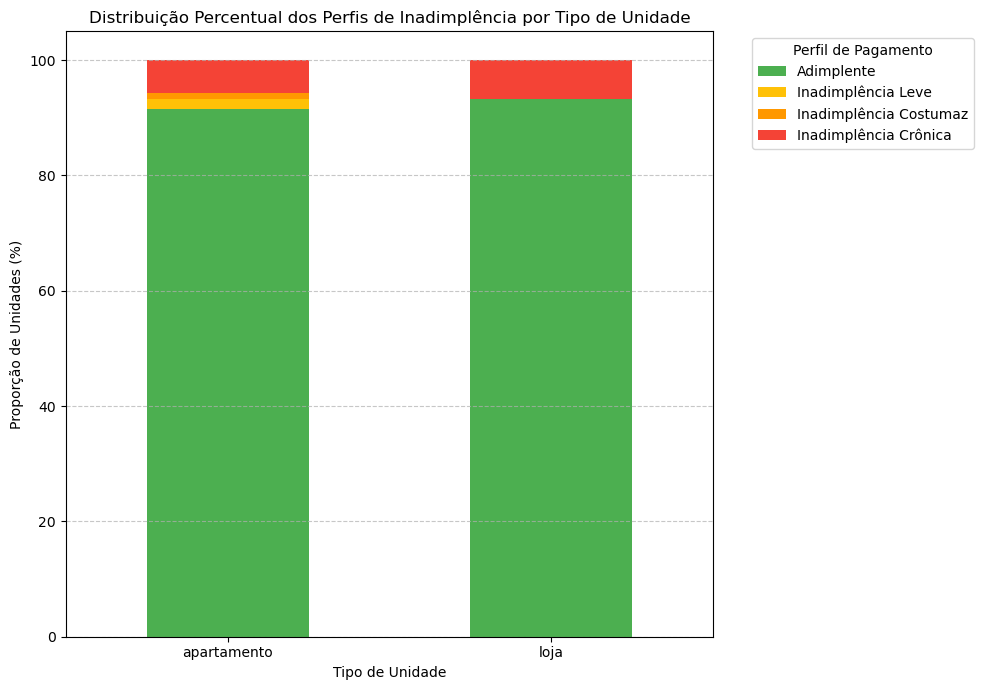

In [ ]:


# Carregar o dataset atualizado 
predio = pd.read_csv('condominio.csv')
# Converter a coluna 'pagou' para numérica
predio['pagou_num'] = predio['pagou'].astype(int)
inadimplencia_por_unidade = predio.groupby("unidade_id")["pagou_num"].mean()
unidades_info = predio[['unidade_id', 'tipo_unidade']].drop_duplicates(subset=['unidade_id'])
df_inadimplencia_com_tipo = pd.merge(
    inadimplencia_por_unidade.reset_index(),
    unidades_info,
    on='unidade_id',
    how='left'
)
df_inadimplencia_com_tipo.rename(columns={'pagou_num': 'media_pagamento'}, inplace=True)


### Função para classificar o grupo de inadimplência com base na média de pagamento e usar de legenda no gráfico
def classificar_grupo_inadimplencia(media):
    if media >= 0.9:
        return 'Adimplente'
    elif 0.7 < media < 0.9:
        return 'Inadimplência Leve'
    elif 0.2 < media <= 0.7:
        return 'Inadimplência Costumaz'
    else: # media <= 0.2
        return 'Inadimplência Crônica'

df_inadimplencia_com_tipo['grupo_inadimplencia'] = df_inadimplencia_com_tipo['media_pagamento'].apply(classificar_grupo_inadimplencia)


### Grafico de barras empilhadas para mostrar a distribuição percentual dos perfis de inadimplência por tipo de unidade
ordem_grupos = ['Adimplente', 'Inadimplência Leve', 'Inadimplência Costumaz', 'Inadimplência Crônica']
cores_grupos = {
    'Adimplente': '#4CAF50', # Verde
    'Inadimplência Leve': '#FFC107', # Amarelo
    'Inadimplência Costumaz': '#FF9800', # Laranja
    'Inadimplência Crônica': '#F44336' # Vermelho
}
# Criar a tabela de contingência para as contagens
# `normalize='index'` mostra a proporção percentual dentro de cada tipo de unidade
tabela_grupos_tipo = pd.crosstab(
    df_inadimplencia_com_tipo['tipo_unidade'],
    df_inadimplencia_com_tipo['grupo_inadimplencia']
).reindex(columns=ordem_grupos, fill_value=0) # Garante a ordem e preenche vazios com 0
tabela_grupos_tipo_pct = tabela_grupos_tipo.div(tabela_grupos_tipo.sum(axis=1), axis=0) * 100


plt.figure(figsize=(10, 7))

# Plotar o gráfico de barras empilhadas
tabela_grupos_tipo_pct.plot(kind='bar', stacked=True, figsize=(10, 7), color=[cores_grupos[col] for col in ordem_grupos])

plt.title('Distribuição Percentual dos Perfis de Inadimplência por Tipo de Unidade')
plt.xlabel('Tipo de Unidade')
plt.ylabel('Proporção de Unidades (%)')
plt.xticks(rotation=0) # Não girar os rótulos do eixo X
plt.legend(title='Perfil de Pagamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
### Quantidade de inadimplentes por faixa 
print(inadimplentes_leve.count())
print(inadimplentes_costumazes.count())
print(inadimplentes_cronicos.count())
print (adim)

5
3
19


In [ ]:
### Buscando as unidades inadimplentes pelo índice
print(inadimplentes_leve.index)
print(inadimplentes_costumazes.index)
print(inadimplentes_cronicos.index)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### Até esse momento, conseguimos identificar os tipos de inagimplentes, quais unidades e quantas são, identificar a baixa inadimplencia levando em consideração o tamanho do condomínio.
### Os proximos passos serão:
### Criar um grafico de linhas que ilustre os grupos de inadimplentes, mostrando a evolução mensal de cada grupo.
### identificar os meses com maior inadimplencia e procurar padroes entre os grupos de inadimplentes.
### Acrescentar uma coluna de "cota extra" para análise posterior
### Identificar quais os meses as unidades devedoras costumazes e cronicas pararam de pagar.
### Criar um gráfico de barras que ilustre a evolução mensal da inadimplência e o quanto o condomínio deixou de arrecadar.
### Criar uma coluna valor real de arrecadação, excluindo os inadimplentes para simular quanto seria o valor do condomínio se não houvesse inadimplência.
### Criar uma coluna de previsão orçamentária, considerando o valor real de arrecadação e o valor real de despesas.